In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
#from sklearn.model.selection import train_test_split

train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', 'int')

test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt')

naive_bayes_model = MultinomialNB()

#x_train, y_train, x_test, y_test = train_test_split(train_x, train_y)

naive_bayes_model.fit(train_images, train_labels)
naive_bayes_model.predict(test_images)

naive_bayes_model.score(test_images, test_labels)


0.846

In [3]:


#naive_bayes_model.fit()
#naive_bayes_model.predict()

#naive_bayes_model.score()
    

In [6]:
def value_to_bins(x, nums):
    num_bins = np.linspace(start=0, stop=255, num=nums)
    x_to_bins = np.digitize(x, num_bins)
    return x_to_bins

print(value_to_bins(train_images, 5))

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [41]:
model = MultinomialNB()

model.fit(value_to_bins(train_images, 5), train_label)
print(model.score(value_to_bins(test_images, 5), test_labels))

0.806


In [52]:
num_bins = [3, 5, 7, 9, 11]

max = -1
X = []
for i in num_bins:
    model = MultinomialNB()
    y = model.fit(value_to_bins(train_images, i), train_label)
    X.append(y)
    x = model.score(value_to_bins(test_images, i), test_labels)
    if max < x:
        max = x
    print(x)

0.802
0.806
0.81
0.81
0.814


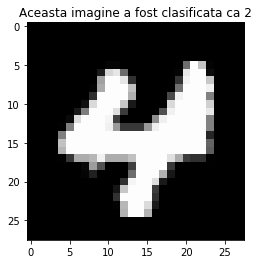

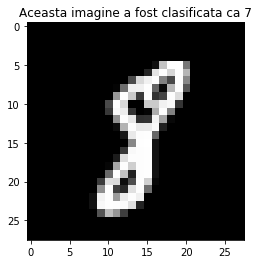

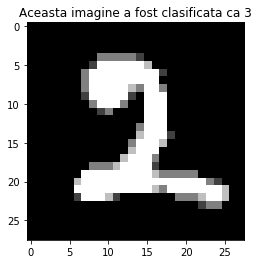

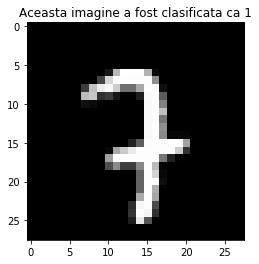

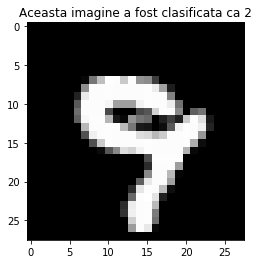

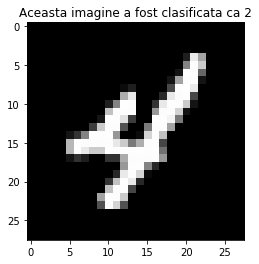

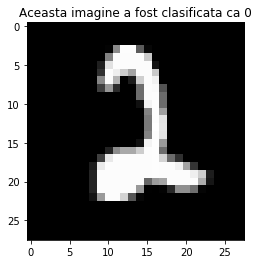

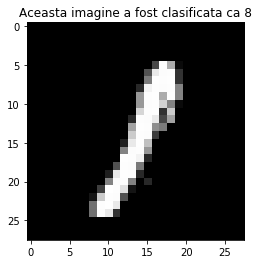

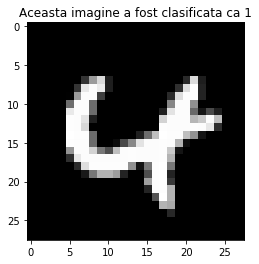

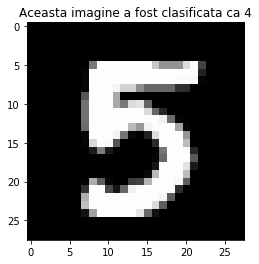

In [99]:
naive_bayes_model = MultinomialNB()

train_to_bins = value_to_bins(train_images, 11)
test_to_bins = value_to_bins(test_images, 11)

naive_bayes_model.fit(train_to_bins, train_labels)
predictions = naive_bayes_model.predict(test_to_bins)

count = 0
for i in range(len(predictions)):
    if predictions[i] != train_labels[i] and count < 10:
        count = count + 1
        img = np.reshape(train_images[i], (28, 28))
        plt.imshow(img.astype(np.uint8), cmap='gray')
        plt.title('Aceasta imagine a fost clasificata ca ' + str(predictions[i]))
        plt.show()

In [102]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(naive_bayes_model, test_images, test_labels)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (F:\FMI\Anul_II\Sem_2\IA\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)